# Minería de datos, Incendios: Analisis de Datos de los CSV

## importaciones de las librerías
### Importamos Pandas para:
<ul>
    <li>El trabajo con CSV</li>
    <li></li>
</ul>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

## Importación de la data

In [2]:
cicatrices_incedios = pd.read_csv("https://raw.githubusercontent.com/Kiki1108/incendios/refs/heads/main/data/cicatrices_incendios_resumen.csv")
cicatrices_incedios.head()

,fireID,season,code,cut_reg,region_conaf,name_conaf,area_conaf,ign_date_conaf,ctrl_date_conaf,lat,...,height,total_area,area_unchs,area_lows,area_mods,area_hs,firescar_poly,sev_poly,overlap,obs
0,ID10000,1986,CL-BI,8,Biobío,RAPELCO,51.0,1986-01-04,1986-01-04,-37.6710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID100000,2003,CL-ML,7,Maule,MAITENHUAPI,50.0,2003-02-09,2003-02-09,-35.3283,...,46.0,4.278272e+05,0.0,0.0,178748.092346,2.490791e+05,1.0,57.0,NaN,NaN
2,ID10002,1986,CL-BI,16,Ñuble,LAs chilcas,87.0,1986-02-03,1986-02-03,-36.6711,...,118.0,3.227681e+06,0.0,0.0,710373.072388,2.517308e+06,16.0,423.0,NaN,The ignition point is located in the current C...
3,ID100027,2003,CL-ML,7,Maule,LAS CATALINAS II,80.0,2003-02-15,2003-02-16,-35.5755,...,114.0,1.155078e+06,0.0,0.0,539904.116699,6.151739e+05,6.0,122.0,NaN,NaN
4,ID10003,1986,CL-BI,16,Ñuble,NAHUELTORO 1,53.0,1986-02-06,1986-02-06,-36.4938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ¿Qué significa cada una de las columnas?

<ul>
    <li><strong>fireID</strong> → Identificador único del incendio.</li>
    <li><strong>season</strong> → Año en que ocurrió el incendio.</li>
    <li><strong>code</strong> → Código del área donde ocurrió el incendio (probablemente código regional o de país).</li>
    <li><strong>cut_reg</strong> → Código de la región administrativa en la que ocurrió el incendio.</li>
    <li><strong>region_conaf</strong> → Nombre de la región según la CONAF (Corporación Nacional Forestal de Chile).</li>
    <li><strong>name_conaf</strong> → Nombre asignado al incendio en los registros de CONAF.</li>
    <li><strong>area_conaf</strong> → Área del incendio registrada por CONAF en hectáreas.</li>
    <li><strong>ign_date_conaf</strong> → Fecha de inicio del incendio.</li>
    <li><strong>ctrl_date_conaf</strong> → Fecha en que el incendio fue controlado.</li>
    <li><strong>lat, lon</strong> → Latitud y longitud del incendio.</li>
    <li><strong>firescar</strong> → Identificación de la cicatriz del incendio (probablemente en imágenes satelitales).</li>
    <li><strong>folderloc</strong> → Ubicación del archivo en la base de datos.</li>
    <li><strong>firescar_img_name</strong> → Nombre de la imagen satelital de la cicatriz del incendio.</li>
    <li><strong>prefire_img_name</strong> → Nombre de la imagen satelital previa al incendio.</li>
    <li><strong>postfire_img_name</strong> → Nombre de la imagen satelital posterior al incendio.</li>
    <li><strong>rdnbr_img_name</strong> → Nombre de la imagen con el índice RDNBR (relacionado con la severidad del incendio).</li>
    <li><strong>sev_img_name</strong> → Imagen de severidad del incendio.</li>
    <li><strong>firescar_vec_name</strong> → Nombre del archivo vectorial de la cicatriz del incendio.</li>
    <li><strong>sev_vec_name</strong> → Nombre del archivo vectorial de la severidad del incendio.</li>
    <li><strong>north_lat, south_lat</strong> → Latitud máxima y mínima del área afectada.</li>
    <li><strong>west_lon, east_lon</strong> → Longitud máxima y mínima del área afectada.</li>
    <li><strong>width, height</strong> → Dimensiones de la zona afectada (posiblemente en píxeles o metros).</li>
    <li><strong>total_area</strong> → Área total afectada (posiblemente en m²).</li>
    <li><strong>area_unchs</strong> → Área sin cambios después del incendio.</li>
    <li><strong>area_lows</strong> → Área con baja severidad de quemado.</li>
    <li><strong>area_mods</strong> → Área con severidad moderada.</li>
    <li><strong>area_hs</strong> → Área con alta severidad.</li>
    <li><strong>firescar_poly</strong> → Polígonos de cicatrices de incendios.</li>
    <li><strong>sev_poly</strong> → Polígonos de severidad del incendio.</li>
    <li><strong>overlap</strong> → Superposición con incendios previos o cicatrices antiguas.</li>
    <li><strong>obs</strong> → Observaciones adicionales sobre el incendio.</li>
</ul>


## Analisis del estado / calidad de los datos

In [3]:
# Analisis de missing values
cicatrices_incedios.isna().sum()

fireID                   0
season                   0
code                     0
cut_reg                  0
region_conaf             0
name_conaf               0
area_conaf               0
ign_date_conaf           0
ctrl_date_conaf          0
lat                      0
lon                      0
firescar                 0
folderloc             4097
firescar_img_name     4097
prefire_img_name      4097
postfire_img_name     4097
rdnbr_img_name        4097
sev_img_name          4097
firescar_vec_name     4097
sev_vec_name          4097
north_lat             4097
south_lat             4097
west_lon              4097
east_lon              4097
width                 4097
height                4097
total_area            4097
area_unchs            4097
area_lows             4097
area_mods             4097
area_hs               4097
firescar_poly         4097
sev_poly              4097
overlap              10064
obs                  11589
dtype: int64

In [4]:
# Revisión de duplicados
print(cicatrices_incedios.duplicated().sum())

0


In [5]:
# Descriptores generales
# Cantidad, media, desviación estandar, minimo, maximo, quartiles.
cicatrices_incedios.describe()

,season,cut_reg,area_conaf,lat,lon,firescar,north_lat,south_lat,west_lon,east_lon,width,height,total_area,area_unchs,area_lows,area_mods,area_hs,firescar_poly,sev_poly
count,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,8153.000000,8153.000000,8153.000000,8153.000000,8153.000000,8153.000000,8.153000e+03,8153.0,8.153000e+03,8.153000e+03,8.153000e+03,8153.000000,8153.000000
mean,2002.889878,8.788898,162.016658,-36.160550,-72.021913,0.665551,-35.766741,-35.783576,-71.909786,-71.891267,68.718876,62.469766,3.053903e+06,0.0,2.389187e+04,8.062175e+05,2.223797e+06,5.899546,216.848645
std,10.358023,3.309122,1698.260123,2.410442,0.785569,0.471817,2.371484,2.372316,0.782938,0.782595,101.786266,102.178169,3.117599e+07,0.0,5.755228e+05,8.000398e+06,2.332097e+07,97.444902,1985.821834
min,1985.000000,4.000000,10.000000,-43.843300,-74.232600,0.000000,-43.833025,-43.880995,-74.119635,-73.997823,3.000000,2.000000,4.345003e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,1994.000000,6.000000,15.000000,-38.005300,-72.592200,0.000000,-37.786644,-37.805778,-72.485689,-72.462243,26.000000,22.000000,1.631970e+05,0.0,0.000000e+00,3.468296e+04,9.348120e+04,1.000000,18.000000
50%,2004.000000,8.000000,26.000000,-36.548950,-72.052800,1.000000,-35.463331,-35.479501,-71.754281,-71.734877,43.000000,37.000000,3.977722e+05,0.0,0.000000e+00,9.522537e+04,2.602239e+05,2.000000,41.000000
75%,2013.000000,10.000000,70.000000,-33.962850,-71.382900,1.000000,-33.631307,-33.646399,-71.326862,-71.305572,76.000000,67.000000,1.170953e+06,0.0,0.000000e+00,2.929125e+05,8.210708e+05,3.000000,102.000000
max,2018.000000,16.000000,159813.000000,-29.511200,-70.222200,1.000000,-29.857036,-29.858922,-70.223552,-70.217892,2229.000000,2433.000000,1.353321e+09,0.0,3.761882e+07,3.236190e+08,1.031391e+09,5286.000000,87752.000000


In [6]:
# Revisión de tipos de datos
cicatrices_incedios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fireID             12250 non-null  object 
 1   season             12250 non-null  int64  
 2   code               12250 non-null  object 
 3   cut_reg            12250 non-null  int64  
 4   region_conaf       12250 non-null  object 
 5   name_conaf         12250 non-null  object 
 6   area_conaf         12250 non-null  float64
 7   ign_date_conaf     12250 non-null  object 
 8   ctrl_date_conaf    12250 non-null  object 
 9   lat                12250 non-null  float64
 10  lon                12250 non-null  float64
 11  firescar           12250 non-null  int64  
 12  folderloc          8153 non-null   object 
 13  firescar_img_name  8153 non-null   object 
 14  prefire_img_name   8153 non-null   object 
 15  postfire_img_name  8153 non-null   object 
 16  rdnbr_img_name     815

In [7]:
# Revisión de valores únicos por columna
cols = cicatrices_incedios.columns.tolist()
for col in cols:
    print(f"{col}: {cicatrices_incedios[col].unique()}")

fireID: ['ID10000' 'ID100000' 'ID10002' ... 'ID9999' 'ID99995' 'ID99998']
season: [1986 2003 1987 1985 2004 2005 2006 2007 2008 2009 2010 2011 1988 2012
 2013 2014 2015 2016 2017 2018 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002]
code: ['CL-BI' 'CL-ML' 'CL-AR' 'CL-VS' 'CL-LI' 'CL-LR' 'CL-CO' 'CL-LL' 'CL-RM']
cut_reg: [ 8  7 16  9  5  6 14  4 10 13]
region_conaf: ['Biobío' 'Maule' 'Ñuble' 'La Araucanía' 'Valparaíso' 'OHiggins'
 'Los Ríos' 'Coquimbo' 'Los Lagos' 'Santiago']
name_conaf: ['RAPELCO' 'MAITENHUAPI' 'LAs chilcas' ... 'CUATRO ESQUINAS' 'LA REINA'
 'BALLICA NORTE 3']
area_conaf: [  51.   50.   87. ...  685. 1020. 1045.]
ign_date_conaf: ['1986-01-04' '2003-02-09' '1986-02-03' ... '2002-12-01' '1986-01-15'
 '2003-01-16']
ctrl_date_conaf: ['1986-01-04' '2003-02-09' '1986-02-03' ... '1986-01-15' '2003-01-16'
 '2003-01-17']
lat: [-37.671  -35.3283 -36.6711 ... -36.1722 -35.9472 -35.8431]
lon: [-72.3978 -71.5799 -71.9708 ... -71.8282 -71.6757 -71.7295]
firesc

In [8]:
# Asegurarse que ign_date_conaf es de tipo datetime
cicatrices_incedios["ign_date_conaf"] = pd.to_datetime(cicatrices_incedios["ign_date_conaf"])

# Extraer solo el mes en formato numérico (01, 02, ..., 12)
cicatrices_incedios["mes_incendio"] = cicatrices_incedios["ign_date_conaf"].dt.strftime("%m")

# Crear el gráfico Sunburst
fig = px.sunburst(cicatrices_incedios, path=["region_conaf", "mes_incendio"])
fig.update_traces(textinfo="label+percent parent")
fig.show()

TypeError: Could not convert string '01020202020202030202010201010202020303030201030203031203030404010404041104020404040204041201020505020101030304040301010101010101010102021102020202020202020203030303110303030303031103030404040404040404040404040201020301030303040404050102120412111201010101010202020202030405020202030505120101010101020202020202020202020303030303030303030303030303030303030303030303030303040404020203030402010103010201121201010101120101020202021202020203030303030303030301020401010202020203030303010101010102030401020207111112121212121212121212121212120101010101010101010102020202020202010202020303030304010101020101020202020202020202020202020202020202020202030312020303040404010101010101010102011202020203010103021201010304100212020302030302100311111212120103020302020303010112030202120102111202031204121212120312120202030202020301010802020103020302010203030201010201020210111102121202010102020203121201010202120202030201030301010108111203030301120212010102020302120201110101020101020202030112020202010111021212020302020303010201020201010303020202030212120202030502121212121201021202030201020202010212120101020203020212030112011002011012120201021003010102111112120303020201020112110102030303030312120301020311020102010102030211021111121212021201010102110101010302010202101212011212010103020103010201010202020112010302020112010201021201010202010212030203021103111203020202011002120112120101110102020201010202021212020102020102020201010101111212021212020102121202120301020201020101010101010212021203120203010102010112121212010201120101020212010111020112120202020202030303030404040404040412010101020202020212020303020301030303030101010101020102020403010204121212010101010202031212010102030401010102020303030304010303040404020204010401120202010112020204010303121201010203010202020203040401020202020203120404010311031212120203010201030101020102020211040202010202011201021212120101010102030312010101010102020101010102020203030204020303020312010102030102010204030204010212020102040201020101011209120103051201010203010102030102040202020201020101020202010103020301020201010204010212110302120101010402010101031212010104020304020201030102121212030204030301010302031103110301110203020101120202030201020202040101010204020212030201020202120402040202010112020102020201111201030302120402010201030212020302010104020302020103030103030101040101030202040103011201020202020202020201030302010212120102040201020112040102010402041204011212030201030201010402010102020101010112020112010201010202121212010202011201120101010202020202020202020202021202020202020202020202020303030303030303030303030303030303030303030303030303030101020112020512120101020203030401020203010104010109030102111111111201010502020303040402010311121202030203030203030302020411121211020202121204110101010102020303030302031111121212121201020202110203010103010102030302111212120101010404010102010101041203111201030311011211111112120103041204020211110103010410120512010202020211121201020201010412010103010102030202021201011201010201040211020301021204091203010212010205011201031112120312110101011212020203040311011201051202020101010501021102120205010301021201030202010103010101010101040202020202020202020202020203090105111101010104120304010102010101110311121202020103120303020302020212041201030212030201020312020301020610020305020412030211030101020201030202120111101212020203030402010201010303040401120202030312120612050511121203030102010301120101010403010302020202110302011102120312120202120202111201010203120202020302120212010103020303030302010412120101010112050301010102121202030101120103010101010101010101010101010101010101010112010102020102020202020212020402030304030304030304030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030303030312040101040101010401010401010101040101010101010401020204020201101202020101020202030303050202020501020303120101111111120203041201030502020201030312030312010202020203020204030103020103010201021104010101111202020203020201010101010303020302020103030202010112011010111201010304040102100201020202030202010402111202020102010202011212010202010204120102021202120402030102030202090103010102020304010202030103020102010203120102010202091103011201020202030102010202110111021201010202100101080101010202030202010203011103020202020101020202091103010202030201030103040102031001020201011202010102020203020203010202020202031201010202010303041102120301010102021203010201030401120102020302021202020212010202020202010201020102020302020202020101020202020203020212011212010201010101010203021202020103020201020211020902021002020101030212020201020202010204110202020202010202010304020202040202020202020303030303030303030303030303030303030303030303030303030303030303030303030303121212121212121212010101031202011101010109010112041203010103010112030301010103120104111201010211010204010101020312010101010102011101020202010101020201110303031201020103010201020201020301030202031201030101010103040101030103020212020101020203010103120102010104111202030101011212120103010101010111040302120202030102030212120203090102010101020201010202020101010304030202020203010302110101030202110202010101010202031101030203030401010302020212120301040203020202030201030302120101020104021103030101020312010203010202031202030301020303010102120301040201041202020209010104010112010102010101030303010102040103010201011201010304010101010201020104010102011102030202120103100112120111010303020112010204020203010202031103040404040203030112010402030210110312030103030201010101010302020201010202010101020112040112010102010202020102021201121203010301030103020103020101010201020103010402020103030102030202010101120301010201020201010302020201110101010101040101010312120101030101010101010101010101020202020303030304040102010201120201120109010204050102111212010211120212011212020312010201020102010301011103120102010102121203091201040101020201030202090101021201040212120102120101090212121209041201011204120101021201090112111201010101121201040103040210020212121203030103120302011201120102120109031112010304030101030102120112010203010301031201111209040202020104120112010102120101021212090312121101120102011002030401011203120101121201011203120312041002011202120301121202020102120111011201021212010201010102020304021203021212010301121201010401030304121212011201121201120101121101030101050212120112120112120112120101010112040101040103040102030303110203020303030303020301020203010102020301020202030303030301010303030302020202020203030102020201120102010203030302020203020203031201020103030201011201020102030103020303101202030303020312031201010202031101041102020201021212121201010201010101010303100101030103030302020202010212121104041212010102020301010103010203020302121110020201051102020201011211120101030303030102010312120102010212100303010301030102020301010101020211020303010303030303120103110101030302020101010101010401010102050103030312110101120203010602120101010310110301020202030101120202040101020301020202010202020501110205020312020201020202030412040102120203020211120203050202120103120212011211120203010101030104120101020109040301011112010102020101120102010302030305011201030202121203120301120512120104021201021201021205041212020212020101011201030202121203011202010202030203030302030303010203030203020302030103030203020202020102020303030103020202020112020203030202021212120212120303031202020202121201120104041201020511121112010101020203011104051201120402040203121202110102020103111202011212020202021101120101120304120112010402120412011112010202040112021201120202120310121201020312020201010402021202010503020201020101110102010112020103010212120111021203041212010203010112030212120202030302120203010401110202040103020102010101120101120102041203011101120102020312030301030311010205111210010112120302040112090412010202010101010112120202110201010102020202030312011201021002020101010102110102031112010201010211120112010303030101040203010301120102010310020101021201030301020112120203020112031201120204020201110301021202010201121202120101020101021201010101010101010102020202020204030303030303030404030510020201011112011001020302020204021101020203011111111201020112020212120110121102030201110412110102110403111101020302010501010303020102020311040311010901020502010202030401020211121201030212020212020302110303020103010202010303020403111002111204020103040602120204020111110101010201030201020303011211010301120301040202030312120203020103030303010103110403030203011103030203030412030201011203030302120112010303010211030102010203010402030212011202021202030402030201030101020202030202040201030101010201010203010203120104020202060101020903120404040405120101010101010101020303040404041112010101010101020202020303040404040404040403110103010201051212120901110101020301120104120101120112101111120202040203020102031104031211010103041211030112010302020101010311010301111101010111020202030303021012010303020301110101011112011212020102100203121201010301021211010312010111010312030301111112010103110211011212120101020112020401120103010102120101100302010202030303011201090911030201031001110101041202040404010101010101121202010102010212120104010101021203031101020401120101011101011201010102110201011212010211110202011112120301010103120102021201020101010112020101020202010112010202041101010502010102010112010301030101020101010102030101010101030201010312010301020101010804010101010112010112030101011211010301021212010204121101100101010111110111010112120202120112010304120201020101010102010412121212120101010101010101020203010101010101040101010104010101101201011212010112070403031112011112011212121201010112010111011203010112020101011212010301120103040112011212010101011201121201010101011212120101010101121201010101010101020202020202020202020202020202020212020211030212031102030203030101010412041201110306050512120102040211030303030202030311020202020312010102030201010202021203020212050202020302011201010102020202020112110212120202040104021210121201011201030303020101031202020202030403021201020202121102021201040102020102020202030302030502020101010202010301020303030202010103010203011101010202040101010201030304040101010102010102020203030103011201020302010303120303120102010101010202020403020201030102120305020203020212020102020301030302011212020212030401020203030103120202010201021201010301031203010303040101010202021101011102030103030102030202030102030101030103030301030203020203010103030303010201110103010102010203030202030301110303020202020601010112020312020101020102020202020301030101010201030201010102120102010202120102020204020202010203031202020101030201020212120203020201120201030212020104020101040101030202121204020103010202040202010202020101020312020203020102041203020102030203020302010203010103010202030303010102010302010103030303010103040203020103010201031101010101020203010101020302010101020304050303020201021203030102010302020203010103010302030202020211010202120102020202010202020301021202031202020304030203010203030102030301030202030102020301020202020202100102020301010303020112030204010201010301010301120204020302020202020101010208020102020201020201010201030302020201020203020202030202020103010101010101020302020301030603020202020211010106120303020203020102020102030101030102120201030202020101020101020103010301020202020203030202020303030302020203020201020201030302010302020303020302120202030202020203010202020202010202010202030301010303040303040404040404040404040404040202030403020201020301030303030304040404040412121201010202110303030103010103060302010303020207070101020203040401020202030303110202020203030204111212121201010304020402010202010302010301030312020302020301020103030202030112021201020203030302020202030303030203020203030402020202030303011202020302020112030203030102011202010203120102021202010102120302021201010202020203020102030202020303041112120304120205020102030112020303030302020211031202121201030303020102120102120303030304040310121203020303020202020202030303111204030201020302020303040503010302020302020301010303030203030301031203010202010102020101021212020202020203030103030203010302021103020103030202120202030202010302020301030312020103010202040303010201010102010303010102020204021202030202031202010201020312020101020101030303021103120302040102030311020203020201030303030203010303070303021202020203020302120301040203030303010203120202020303020303030101040102030203120202011002020203020203020102020102120312110112020202030101011203020303021201030102020302020202020202020202020202020304040102020202010202020202020202020202020202020202020212021201121201120311010102020104010301010103020112120203010201010202041011111212121202121212010203010311120103030202020402121212011111121102010201011103010101010110110402010103120201010101101203120101040112011201021009110303010101121103010102121111120512110111121003010104010903111201011112011212120111040102010902031011120103111212010201120101120112120101040303010302010310111111120102120301020111030912010201041101020112110101010211011209121212010311020101010101120101011112010101100303010202010101120308120112120103020112020101120101010103121101010901030301010101010102120211030111030401030101011102110301120312020401090901120203120101010312110111110101030912121203010101120109091211111111110409010102011112010201010102010112010112010101010101110112100301020101100111020112120103120303121110120112031011110111020101110201010101110111011002100112010101121212010102020201010111031201111201010101110201111201120101010102030901110112121211110112010301011201010101010111021101011110111101120101121101010101010103110111111101111211120112120101010111011202030112010212011101111211011212021212011101120111011101010112121101021201010101011101121201111101010101010101010112010101010101010101010101010101011111111111031112121201010102020202020307091111111111111112121212121212121212121212120101010101010101010101010101010101010202020202020202020203030303030303030303030304060107111111121212121212121212010101010101010102020202020203030303030303030304040405010312021111121212121212120101120101010101010101010102020202020202020202020203030303030303030303040405051201010201020203020102121011011111111112020203030211010101021102020211121212121212010101010101010101010101010101010101120112011201010101010101010102020202020202020202020202020202020212020202020202020203030303030303030303030303030303040101010101010101010101010101020201020202020202020202020202030103030101030301010101030303010301020401020101010101010102020202020202020202010302020201030301020201020202121212010101010101010101010101020202020201020202020202010202020202020202020202020202020202020202030303030303030303030311111112011010101111111111111111111111111111111111121212121212121212121212121212121212121212121212121212121201010101010101010101010101010101010101010101010202020202020202020202020303030303030505060101020304040501010304021101020202010204010202120202030303030401121204010312010412120402020203020203010202020304020202030412120101010103010103010102020203010202030303010202020202010101010202020401020101031202020202020204020203040201010102010202030302020201010404020202120203120201030303020202020203040202120404030103020402011111120101010202030103030311111111111212121212121212121212121212121212121201010101020101010101010101010101010101010101010102020102020202020203030303030303030405121010101112121212121212010101010101010101010101020202020202020202030303030303030303030303030304040401101212121212121212010201010102010101020202020202020202020303030303030303030303040404040401121201010101010101020202020202020202030304120404030404040404040402020202020211120202030203050102020303030404040404041201010202020203020202020202020203030303030303030303030203031201010101010102020202020303111112121212120301010101010101010102030303041202010301120102040101010102030301120101020204120104030102110204040211031202120101021101030403020301101212010302030103030304040303120201120301030404030304030303030103020304010203030303030302010403020302020302030402120402020401120202010202010102020202020201010103051002111212121212121212020102010101020202020202030303030405050505051201010101010101020202020303030303051112120101120101010101020203030303030303010101020202030102010101010303030210010202030303030302111111120101010202020203100211020302030101010103030101030103111212030303010103031102111101020201111203101103020303011211010103010101021203021111120101120212010101020202031011111102111111111212021212121212121212120101010101010101020202020202020303040512110312031212121201010101020203031112121201010101010101010101010202021202020202020202020202020202030303030303030303030404010103120103010202020212020202010202020203120303030304030312021201010303020103040312020202020202020202020202020202020202020202020202020202020303030303041201020202020202020202020202020203110212121212010101020302020202020101020202120102020312030102020202030103020201030101030201020203020202020202010103020202020203021102010202010201111201010302020202020303011212010102030103020101040402010203020303020303030103020211010312120303020112020202010203020202030202010204020202020201010203030201020302010102030203030202020202020202020202020212030312121212031212010101010101010101010101010101010202020202020202020202021102020202020303031103030312110412121212010101010101010101010202020202120303030303030101120102120202030303111201010102020202020303120301121203121001020302020301010211011112121212120101010101010101010101010101020202020203030303040402020102011204030102010204010101010202011103020101020302010302030101120212010201020201030210021212120103031001011111111111011212121212121212121212120112121212120201020102010101010101020101010101010101010202020202020202020203030202041112121212120212120101010102010101010101010102020202020303030412121201010201010101020202020202020203030303040302040104010202020202020204020204020202020202030303030303030402030201020202020202030201020202020202030302010202020203020202010202031010111111111111121212121212121212120101010101010101010101020202020202020203030412010402011202021212020202030112011201120203120401010303110102010303020303010202020201010101020303030301020302020101030311010202030203030202030303030102020202030302020302020302010202010202010411111112121201010102101111111111111103111111111111111212121212121212121212011212121212121212010101010303010101010101020101010202020202020402020203020202020202020203030303030303120404040404040204040211031112121212120101010201020101010101020302020202020202030303030303030303030303030401020311120312121212021202010102010101030102010302020202030202020202030302030301020403030303030302040404030404040403040202010202020101020102120301010103020203011212120101010101020102020203030302030303030303030304101111010103120311010103021103030203030101020202120303031103030303030312120312021012010112010212020303030303030303030302031010101011111111111111111112121212121212121212121212010101010101010102020202020202020303041201020102120201120102020303030312021203030303041202121103020112121203030302031201021211120112120404120312120102010311010303010303010303120204030303020203010103111111111212121212121212010101010101010101010101120203030303030404040404111212120101010101010102020202020203030303030303041112121212121212010101010202020202020303030304040404020203120101010101010101020202020201030303030301030404120101020101010101010304010103010403010301010102010101020102010101020203030203030302021112030303101111011212121212121212121201010101010201010102020202030301020202020201010203010103030312121202020202020103121204030203030303020311120202010201030102020303021202040103020401020103030303020312040403030301010303030302030102010212020103021201030312030304121201121201010101010101010101010101010101010101010101010102020102020202030303030303030404120112121212120101010101010101010202030412010201010101020211121201010112010101021201111202120101110102020303030312120201110102020112031201030502030302120101050103120201120212020312120212010101120302010102010202120203121212010103030212010112010203120304010202030201010202020301021212110102011201020212110201020212021201010103120112121201020501030401021202020101020101031212011201021212120201031212120102121201120202120112120112011101020303031212010212010101121201010103020104010202020502010212011212020103120212120201030212010201120202120301021201020112011202011205010112020204120201121201120202030301121212121201010101010101010101020203040101020402030401010103030404030301010302030111020303121201030205110101041201020304020304010202040303030212030203031004030302030301020301010311120103040403030302010302020202020403030101040402030103030302041002040403040403120303010212040301010203040401030102020302031204030203040303010304040301030104040201020302010303040304120303020304021201040404041212020301040303040312040311020102030202031102030101030301010304030112010102040205011210020101010404010204040202040101021102120301020103020104010204100104040401011105010301040404020201030302030302030301110404040304030301040205010203011201010101021104040404020101050402040404040101010101050101010101020202020102020202020502020102010203030201011201010301110401010202030303020203030202020212030202020103030403011201010501030303030303021202021201010203020404020202040204020102021203040101030403021101010212030302010312010203030303020202010101010202020212010203040202030202020201010303041104010203031201020304020303030304020211020202021201030402020202010303020202030201010101040202010201010102020103030303030201010403120101020302020201030102020201020302011201030303020101030302030102020101020202010304020202010304010201040202020202030102020103020103010202020101010212010202010302010101020202020202020101030201020201020102010202010202020202020203030303030303030303010301030203121212010101010101010101010101010101010202110404120112011010120101020303111201020203030303030411040102020101010202121104010112010212020202120312020201010111031201010402050103120101021111020212021201120201110110010401010212020202120102010212020201121212010403010101010202020101011102030310010204021012011201041011020410011202020102100104111112010404120102011011120312100202010202121111041202010101110204011202101102040212010102021101120202021201010201121011121201030104020101021002020104110202110201030202021111021012020312120202100101121203011002120211120212120102040102120202030203020204040101101002041202021201021204120101010402030403120112020105020202021011010102121202121211020102021002020202120204021204021201021201020204010202120402021204020202020201020202100201021202030202020201010202020202020202020102020202030103030303111101121201010101010101010202120101020202040412011002020412120101010101020205120103021002110301020404040111010102010112120301010301010103120101010202010101021203011201010101010104100102120202111101020103010301120101010402010102120312101202020201100101121202030101020101031212100211040112030101010301010202101012010101031212010401010302011110120103120111010111010112121101011102040212110101010101040101121201030212031103011112121201110101010101011202020202020212010102030303100102110204120303120304120203021201121201010101020203010301040201010102120301010202020101021203120112120112110112120101010402021112120101021203031201030312020202021003011211020102120102020301010302121212010203020102040311010203020103011201010302030302030112031203010102121204020303120402031101030301121201050203030301020303030101030202120103020201030312030301030303111212120102120212011202031201021203040201120203040203010102020211031202010211111201010101020304100101010101020302020102020202121201120102120202021111121202030201020202020201010101010101010102100201020201020201020203021201120202020212010101020202020201101210020201020101120202020101021101101201010104040102030101010201020202111112120101021201020102010202021212120112010212020201021212120102120312120202010112010101020201020202120102010302010201020112111201011212011201120201020201111104020112120212020201020212120304031201021202010202010212020202020402020202010201020101020312020201020211030202020212010102040101021202010202020302020202010201010202021112010104110202010202021202030101020202120201010112020212010101120201010102120301020112020111010202010101120212120102120201021202121212020102020112020210020202011201021201020212010102010201030102011201020202011201020202010202020202020212021102021202011201020202020202020212020202020202020202020212020202021202110202020202020102020201021202010303111111111103121212121212121212010101010102050508111111111203120303121202120302121203120312030201030303010101030101010201010101010101010112010301010101010101010101010202030302030202010102020302030202030202030203020401030203030304040204030104030411010201121212120110010102010102010101020201010101010301010101010101030202020202020201020302020202010202010202021003010312030412040404020102011203031203031212120102120203010301020201010101010202010101010202020102020202' to numeric

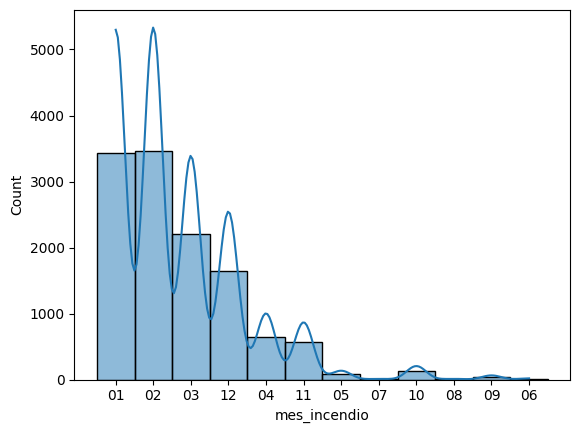

In [9]:
data = cicatrices_incedios["mes_incendio"]
sns.histplot(data, bins=100, kde=True)

mean_val = np.mean(data)
median_val = np.median(data)
std_dev = np.std(data)
min_val = np.min(data)
max_val = np.max(data)

#plt.legend([f'Mean: {mean_val:.2f}', f'Median: {median_val:.2f}', f'Standard Deviation: {std_dev:.2f}', f'Min: {min_val:.2f}', f'Max: {max_val:.2f}'], loc='upper right', ncols=10)

plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')

plt.legend(loc='upper right')

print(min_val)
print(max_val)
print(std_dev)

plt.title("Histogram for average price per room")
plt.show()

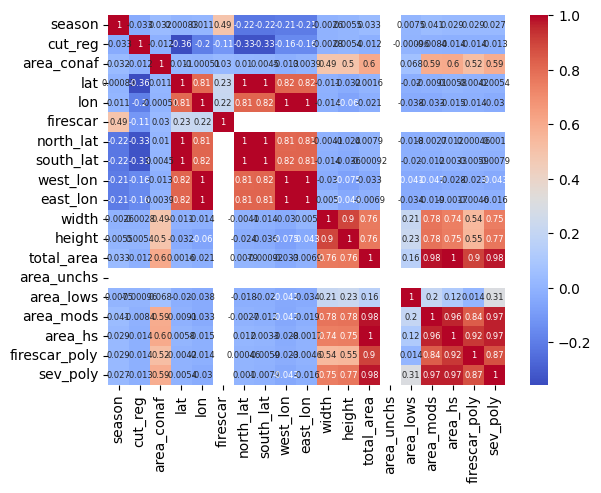

In [10]:
numeric_df = cicatrices_incedios.select_dtypes(include="number")
sns.heatmap(numeric_df.corr(method="pearson"), annot=True, cmap='coolwarm', annot_kws={"size": 6})
plt.show()